_Dataset Attribution:_  This page uses data from the OpenPowerlifting project, https://www.openpowerlifting.org.
    You may download a copy of the data at https://gitlab.com/openpowerlifting/opl-data.

## Using Seaborn for beautiful plotting

[Seaborn]() is a Python package built atop [Matplotlib]() that makes creating certain beautiful plots very easy.  Let's take a look. 

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns

We're going to use a sample file in the [entries.csv](./entries.csv) which contains data from a single powerlifiting meet.

In [2]:
df = pd.read_csv("./entries.csv")

Let's get the dimensions of the data.

In [3]:
df.shape

(89, 12)

In [4]:
df.head()

,Name,BodyweightKg,WeightClassKg,Division,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Place,Event,Sex,Equipment
0,Alexandra Cardoso,47.7,48.0,Open,85.0,42.5,102.5,230.0,1,SBD,F,Raw
1,Silvia Martinez,56.0,56.0,Junior,125.0,70.0,160.0,355.0,1,SBD,F,Raw
2,Patricia Mendes,58.2,60.0,Open,120.0,65.0,142.5,327.5,1,SBD,F,Raw
3,Daniela Dias,55.6,56.0,Open,100.0,55.0,145.0,300.0,2,SBD,F,Raw
4,Maria Lopes,76.0,82.5,M 50-54,90.0,55.0,130.0,275.0,1,SBD,F,Raw


Let's get the full list of columns.

In [5]:
df.columns

Index(['Name', 'BodyweightKg', 'WeightClassKg', 'Division', 'Best3SquatKg',
       'Best3BenchKg', 'Best3DeadliftKg', 'TotalKg', 'Place', 'Event', 'Sex',
       'Equipment'],
      dtype='object')

Npw let's get curious and find out what the relationship is between body weight and the best bench press.  The assumption here is that the more a competitor weighs, the more they would be able to lift (and presumably bench press).  What we want as data scientists is to suspend judgement and to _put  assumptions aside and let the data tell us what that relationship is_.

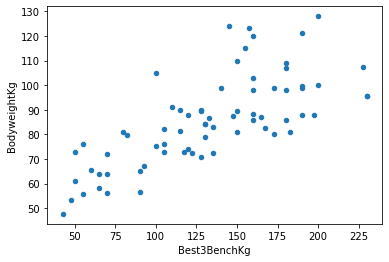

In [6]:
df.loc[:,['BodyweightKg', 'Best3BenchKg']].plot(kind='scatter', x='Best3BenchKg', y='BodyweightKg')

Upon first inspection, we see what appears to be a positive linear relationship.

Now let's see if we break out the data between male and female competitors if something new emerges.  We'd like to see if male competitors data differ from female competitors, but visualizing this in Seaborn will give us some goodies that allow this to be visualized very simply.

If we break out the data along three dimensions (throwing the `Sex` attribute into the data), we might be able to plot something interesting.

In [7]:
bench_to_weight = df.loc[:,['BodyweightKg', 'Best3BenchKg', 'Sex']]

The standard Seaborn plot is not much different from the standard `DataFrame.plot()` method.

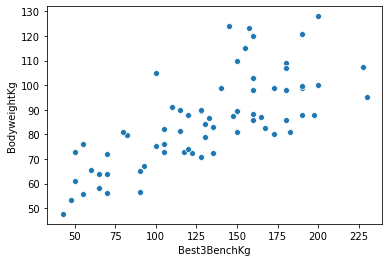

In [8]:
sns.scatterplot(x='Best3BenchKg', y='BodyweightKg', data=bench_to_weight)

_Until_ we show the data through colors, using the third attribute as the color through the `hue` parameter.  Seaborn magic ...

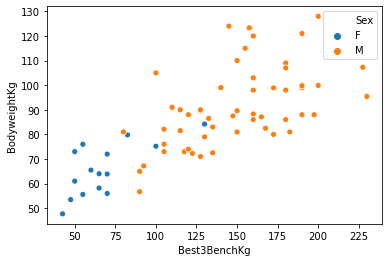

In [9]:
sns.scatterplot(x='Best3BenchKg', y='BodyweightKg', hue='Sex', data=bench_to_weight)

One really nice feature of Seaborn is to plot the linear regression model along with the data.  This is very easily done with [`lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html). 

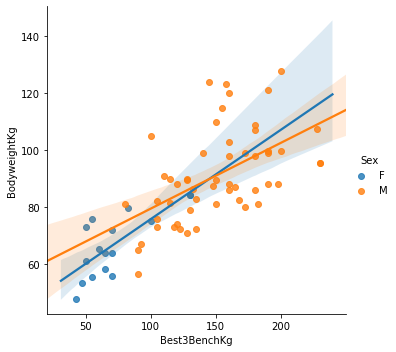

In [10]:
sns.lmplot(x='Best3BenchKg', y='BodyweightKg', hue='Sex', data=bench_to_weight)